## Getting Started with Kaggle: House Prices Competition
https://www.dataquest.io/blog/kaggle-getting-started/

kaggle data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

zhlin 2018-08-28

In [1]:
import pandas as pd
import numpy as np

In [8]:
from matplotlib import pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [136]:
# files downloaed from kaggle
train = pd.read_csv('/data/tutorial/kaggle-house-price/train.csv')
test = pd.read_csv('/data/tutorial/kaggle-house-price/test.csv')
path_result = '/data/tutorial/kaggle-house-price/export_result.csv'

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

skew of saleprice 1.8828757597682129


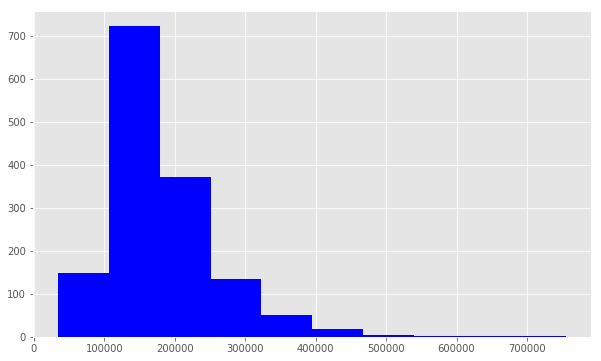

In [16]:
print('skew of saleprice', train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

skew of saleprice after log 0.12133506220520406


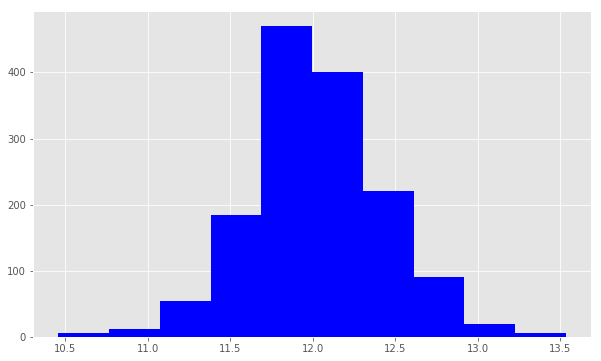

In [20]:
target = np.log(train.SalePrice)
print('skew of saleprice after log', target.skew())
plt.hist(target, color='blue')
plt.show()

In [22]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [25]:
# 筛选出相关的属性，也是重要的属性
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [27]:
corr.head(n=2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.00133,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.02603,0.008283,-0.007683,-0.013585,-0.021407,-0.084284


In [29]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [36]:
# pivot table usage

quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)  # median insteal of mean
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


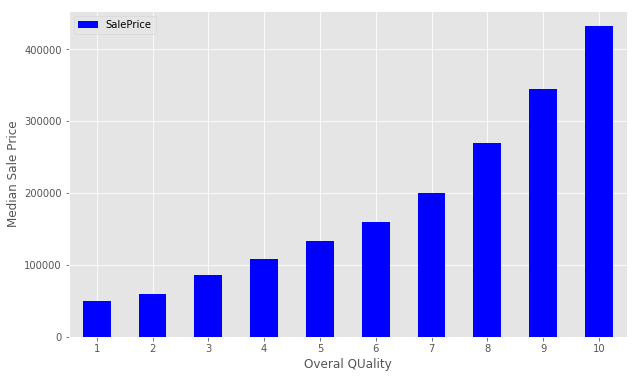

In [38]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overal QUality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Text(0.5,0,'Above grade(ground) living area square feet')

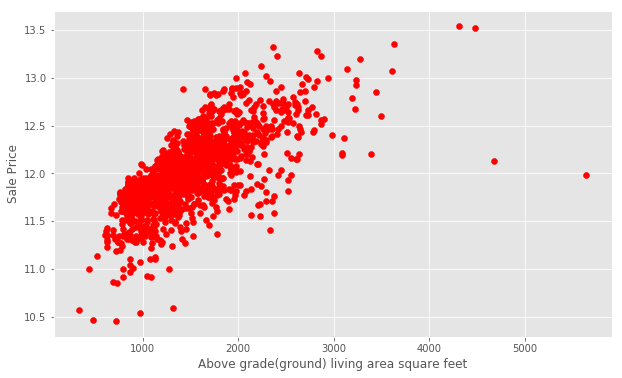

In [47]:
# scatter plot

plt.scatter(x=train['GrLivArea'], y=target, color='r')
plt.ylabel('Sale Price')
plt.xlabel('Above grade(ground) living area square feet')

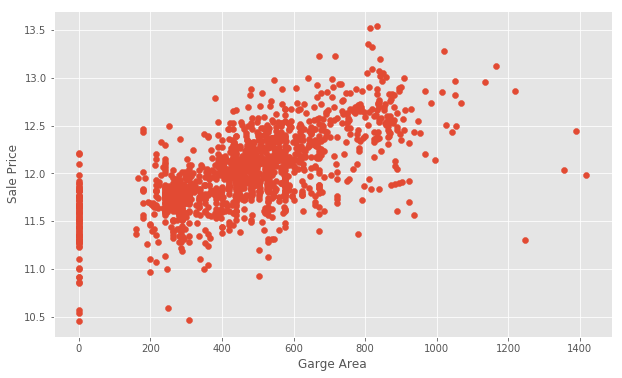

In [50]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garge Area')
plt.show()

In [52]:
train = train[train['GarageArea'] < 1200]

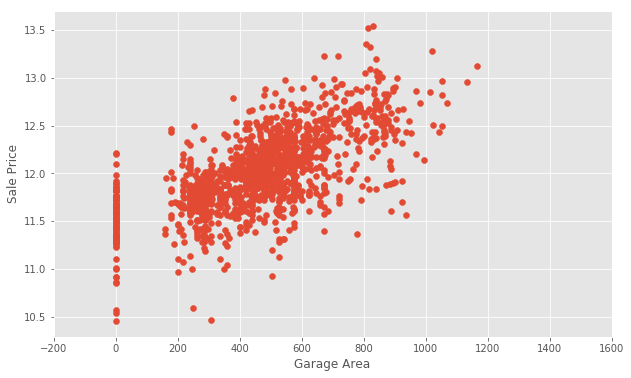

In [55]:
plt.scatter(x=train['GarageArea'], y= np.log(train.SalePrice))
plt.xlim(-200, 1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

### Handling null values

In [68]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [69]:
print('Unique Values of miscfeature:', train.MiscFeature.unique())

Unique Values of miscfeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [70]:
train.MiscFeature

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5       Shed
6        NaN
7       Shed
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16      Shed
17      Shed
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
1430     NaN
1431     NaN
1432     NaN
1433     NaN
1434     NaN
1435     NaN
1436     NaN
1437     NaN
1438     NaN
1439     NaN
1440     NaN
1441     NaN
1442     NaN
1443     NaN
1444     NaN
1445     NaN
1446     NaN
1447     NaN
1448     NaN
1449     NaN
1450     NaN
1451     NaN
1452     NaN
1453     NaN
1454     NaN
1455     NaN
1456     NaN
1457    Shed
1458     NaN
1459     NaN
Name: MiscFeature, Length: 1455, dtype: object

### non numeric features

In [71]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [75]:
print('original street value counts \n', train.Street.value_counts())

original street value counts 
 Pave    1450
Grvl       5
Name: Street, dtype: int64


In [84]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)  # 原文此处有错，处理成train.street了

In [88]:
print('encoded \n', train.enc_street.value_counts())

encoded 
 1    1450
0       5
Name: enc_street, dtype: int64


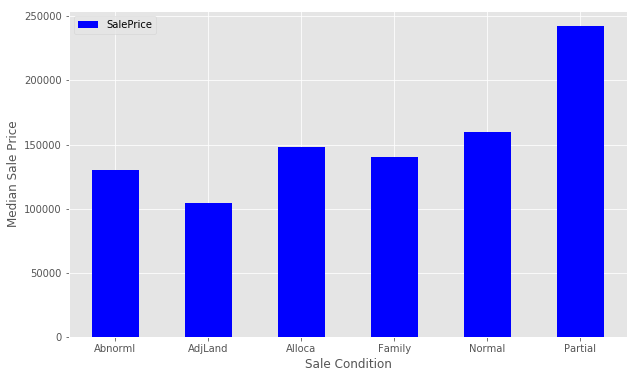

In [89]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [92]:
def encode(x): return 1 if x == 'Partial' else 0

train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

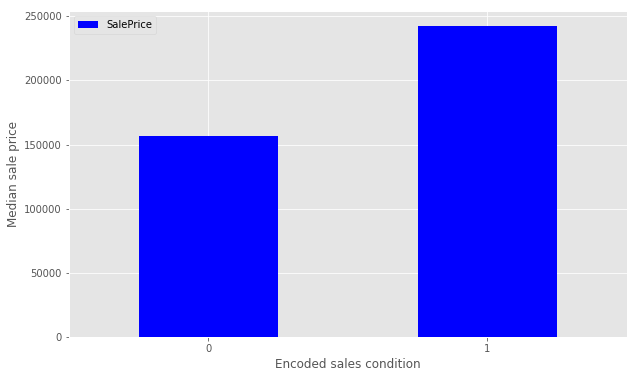

In [94]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded sales condition')
plt.ylabel('Median sale price')
plt.xticks(rotation=0)
plt.show()

In [139]:
train.interpolate?

In [99]:
data = train.select_dtypes(include=[np.number]).interpolate()
sum(data.isnull().sum() !=0)

0

## build linear model

In [101]:
y = np.log(train.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis=1)

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((974, 38), (481, 38), (974,), (481,))

In [108]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
model = lr.fit(x_train, y_train)

In [114]:
r2 = model.score(x_test, y_test)
print('r2 of prediction data:', r2)

r2 of prediction data: 0.8882477709262533


In [112]:
# even if the training data itself
model.score(x_train, y_train)

0.8926335399061596

In [118]:
predictions = model.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predictions)
print('rmse', rmse)

rmse 0.017841794519567907


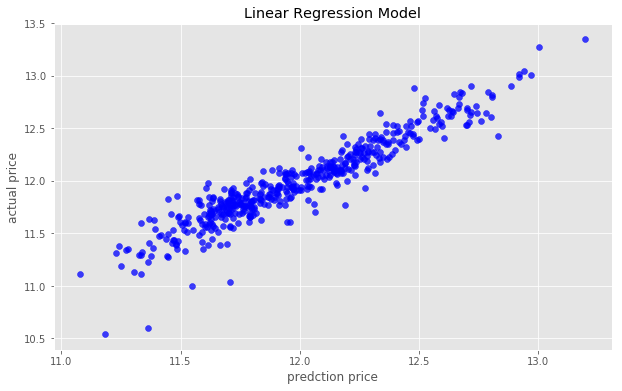

In [119]:
actual_value = y_test
plt.scatter(predictions, actual_value, alpha=0.75, color='blue')  # scatter view of relation between predition and real
plt.xlabel('predction price')
plt.ylabel('actual price')
plt.title('Linear Regression Model')
plt.show()

### ridge linear model

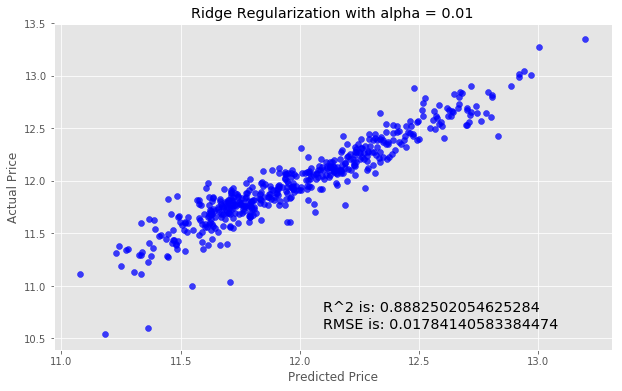

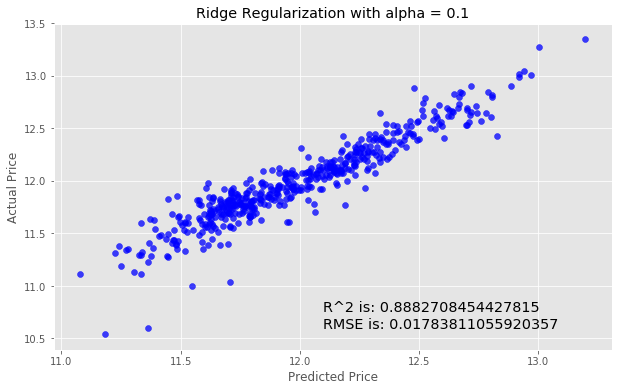

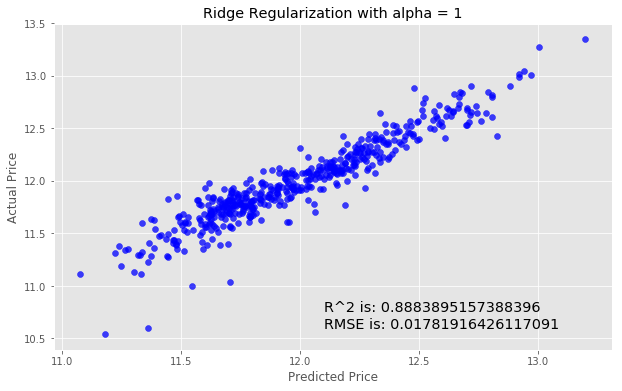

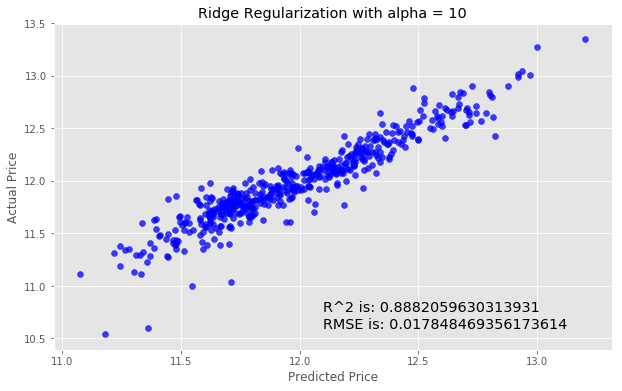

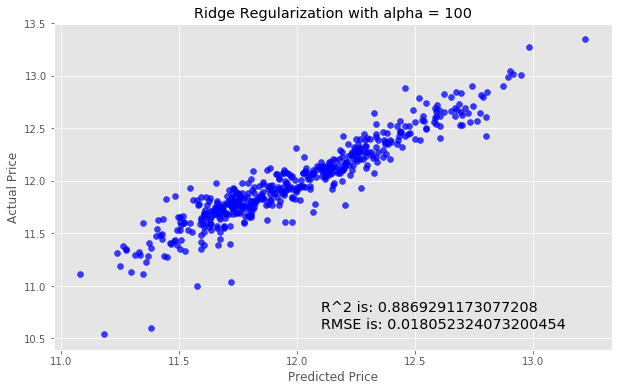

In [125]:
for i in range(-2, 3):
    alpha = 10 ** i 
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    pred_ridge = ridge_model.predict(x_test)
    
    plt.scatter(pred_ridge, actual_value, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title(f'Ridge Regularization with alpha = {alpha}')
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
            ridge_model.score(x_test, y_test),
            mean_squared_error(y_test, pred_ridge))
    plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')
    plt.show()

## submission

In [126]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [129]:
feats = test.select_dtypes(include=[np.number]).drop('Id', axis=1).interpolate()
feats.shape

(1459, 38)

In [132]:
predictions = model.predict(feats)
model, predictions.shape

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 (1459,))

In [133]:
final_preditions = np.exp(predictions)

In [134]:
print('original predictions are:\n', predictions[:5], '\n')
print('final predictions are:\n', final_preditions[:5],'\n')

original predictions are:
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

final predictions are:
 [128959.49172586 122920.74024356 175704.82598101 200050.83263755
 182075.46986405] 



In [135]:
submission['SalePrice'] = final_preditions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [137]:
submission.to_csv(path_result, index=False)

### End, rank 47% in kaggle